This notebook is for evaluating place data from openstreetmaps of type shop.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [3]:
module_path = os.path.abspath(os.path.join('..', 'utils'))

if module_path not in sys.path:
    sys.path.append(module_path)

from utils import DataAnalysis, DataQualityReport

In [4]:
df = pd.read_csv('osm_places_shop.csv')

threshold = int(0.03* df.shape[0])
df = df.dropna(axis=1, thresh=threshold)

In [5]:
da = DataAnalysis("osm_places_shop", df)

Number of rows: 1933
Number of cols: 29



Column types:
id: int64
lat: float64
lon: float64
name: object
opening_hours: object
shop: object
website: object
addr:city: object
addr:housenumber: object
addr:postcode: float64
addr:state: object
addr:street: object
branch: object
brand: object
brand:wikidata: object
phone: object
amenity: object
outdoor_seating: object
wheelchair: object
email: object
takeaway: object
drink:espresso: object
cuisine: object
delivery: object
drink:coffee: object
payment:cash: object
check_date: object
payment:credit_cards: object
level: object


 Convert column types to desired ones before continuing


In [6]:
df.columns

Index(['id', 'lat', 'lon', 'name', 'opening_hours', 'shop', 'website',
       'addr:city', 'addr:housenumber', 'addr:postcode', 'addr:state',
       'addr:street', 'branch', 'brand', 'brand:wikidata', 'phone', 'amenity',
       'outdoor_seating', 'wheelchair', 'email', 'takeaway', 'drink:espresso',
       'cuisine', 'delivery', 'drink:coffee', 'payment:cash', 'check_date',
       'payment:credit_cards', 'level'],
      dtype='object')

In [7]:
df.drop(['branch', 'brand', 'brand:wikidata', 'amenity',
        'takeaway', 'drink:espresso',
       'cuisine', 'delivery','payment:cash', 'check_date',
       'payment:credit_cards', 'level'], axis=1, inplace=True)
df['id'] = df['id'].astype('category')

In [12]:
df['addr:postcode'] = df['addr:postcode'].astype('object')

In [13]:
da.df.dtypes

id                  category
lat                  float64
lon                  float64
name                  object
opening_hours         object
shop                  object
website               object
addr:city             object
addr:housenumber      object
addr:postcode         object
addr:state            object
addr:street           object
phone                 object
outdoor_seating       object
wheelchair            object
email                 object
drink:coffee          object
dtype: object

Number of duplicate rows: 0
id 0
lat 0
lon 0
name 140
opening_hours 1331
shop 0
website 1465
addr:city 1552
addr:housenumber 675
addr:postcode 1181
addr:state 1568
addr:street 646
phone 1227
outdoor_seating 1859
wheelchair 1786
email 1869
drink:coffee 1830


Value proportions:
id
357623896      0.000517
8098089422     0.000517
7777154676     0.000517
7773777499     0.000517
7768105455     0.000517
                 ...   
5229542158     0.000517
5229530384     0.000517
5227306335     0.000517
5227305351     0.000517
11938449778    0.000517
Name: proportion, Length: 1933, dtype: float64
name
NaN                              0.072426
Paris Baguette                   0.009312
Insomnia Cookies                 0.004656
Housing Works Thrift Shop        0.004139
Deli Grocery                     0.004139
                                   ...   
Fat Doughnut                     0.000517
Farine Baking Co                 0.000517
Far Deli                         0.000517
Fanelli's Italian Special

d:\CS\summer_project\comp47360-group8\ml_pipeline\data_evaluation\eval_utils\eval_utils.py:261: UserWarning: Glyph 19990 (\N{CJK UNIFIED IDEOGRAPH-4E16}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
d:\CS\summer_project\comp47360-group8\ml_pipeline\data_evaluation\eval_utils\eval_utils.py:261: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
d:\CS\summer_project\comp47360-group8\ml_pipeline\data_evaluation\eval_utils\eval_utils.py:261: UserWarning: Glyph 26360 (\N{CJK UNIFIED IDEOGRAPH-66F8}) missing from font(s) DejaVu Sans.
  plt.savefig(f)
d:\CS\summer_project\comp47360-group8\ml_pipeline\data_evaluation\eval_utils\eval_utils.py:261: UserWarning: Glyph 23616 (\N{CJK UNIFIED IDEOGRAPH-5C40}) missing from font(s) DejaVu Sans.
  plt.savefig(f)


<Figure size 640x480 with 0 Axes>

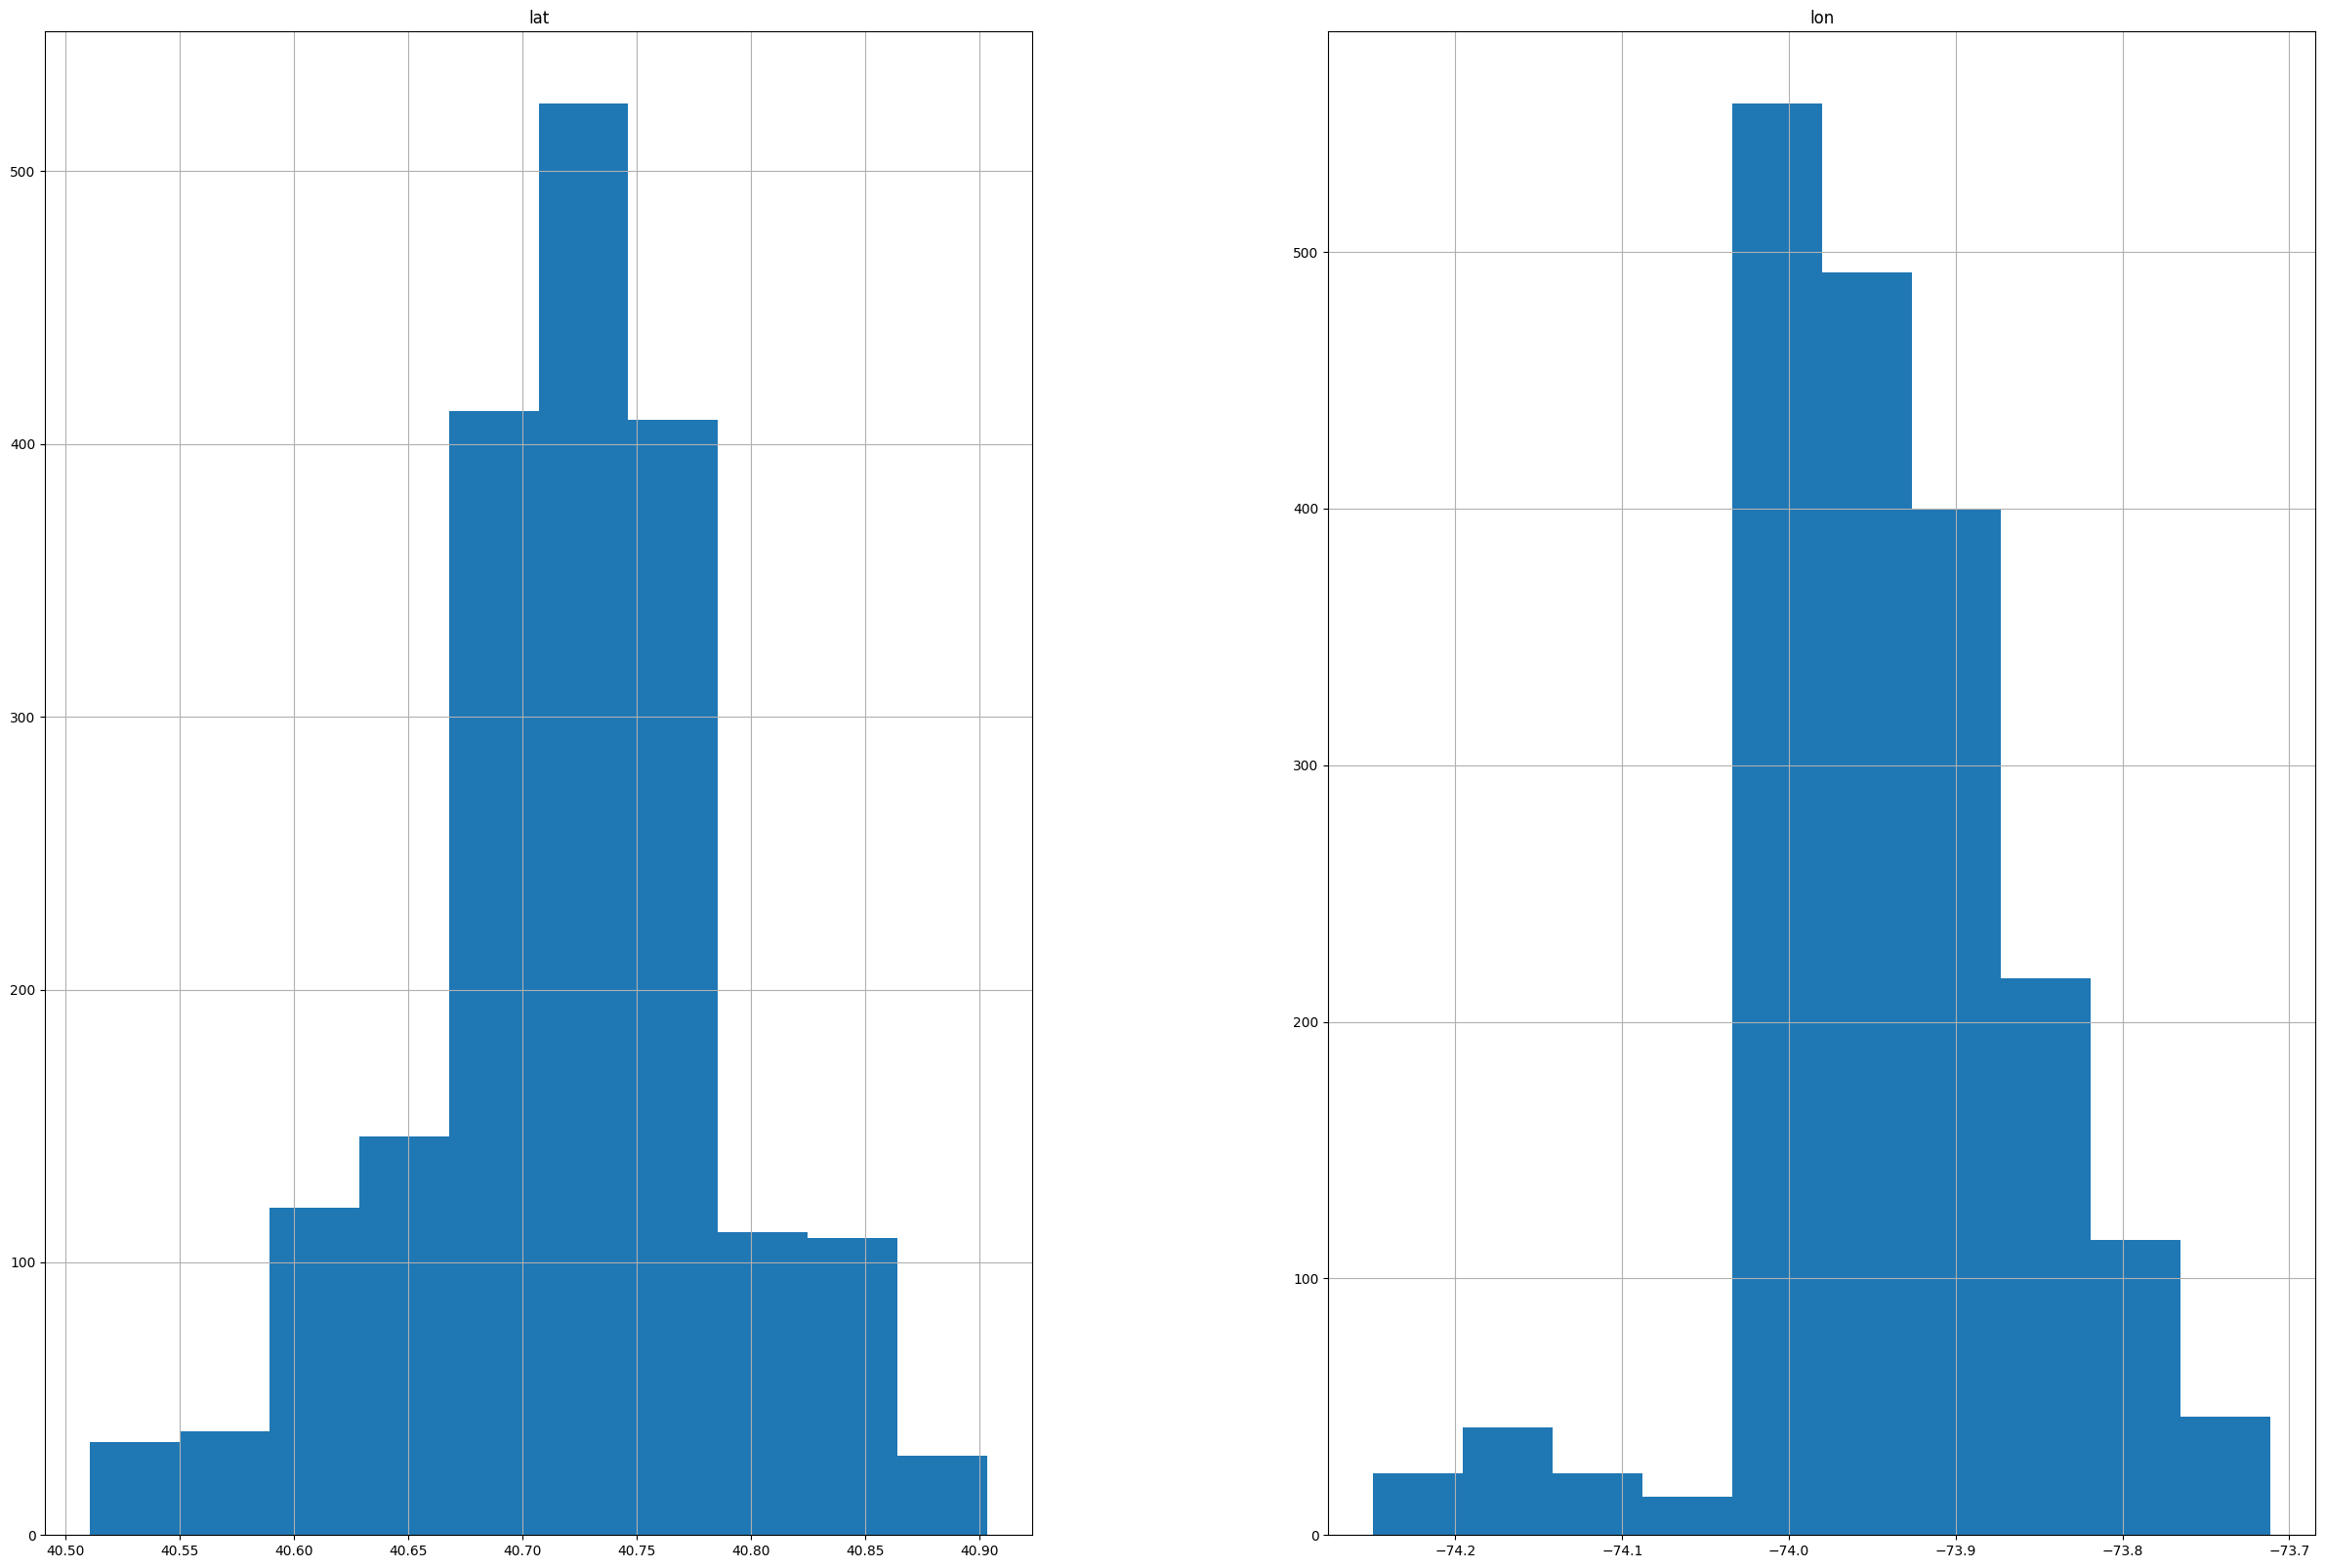

c:\Users\Daniel\miniconda3\envs\COMP47360\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19990 (\N{CJK UNIFIED IDEOGRAPH-4E16}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Daniel\miniconda3\envs\COMP47360\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Daniel\miniconda3\envs\COMP47360\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26360 (\N{CJK UNIFIED IDEOGRAPH-66F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Daniel\miniconda3\envs\COMP47360\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23616 (\N{CJK UNIFIED IDEOGRAPH-5C40}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


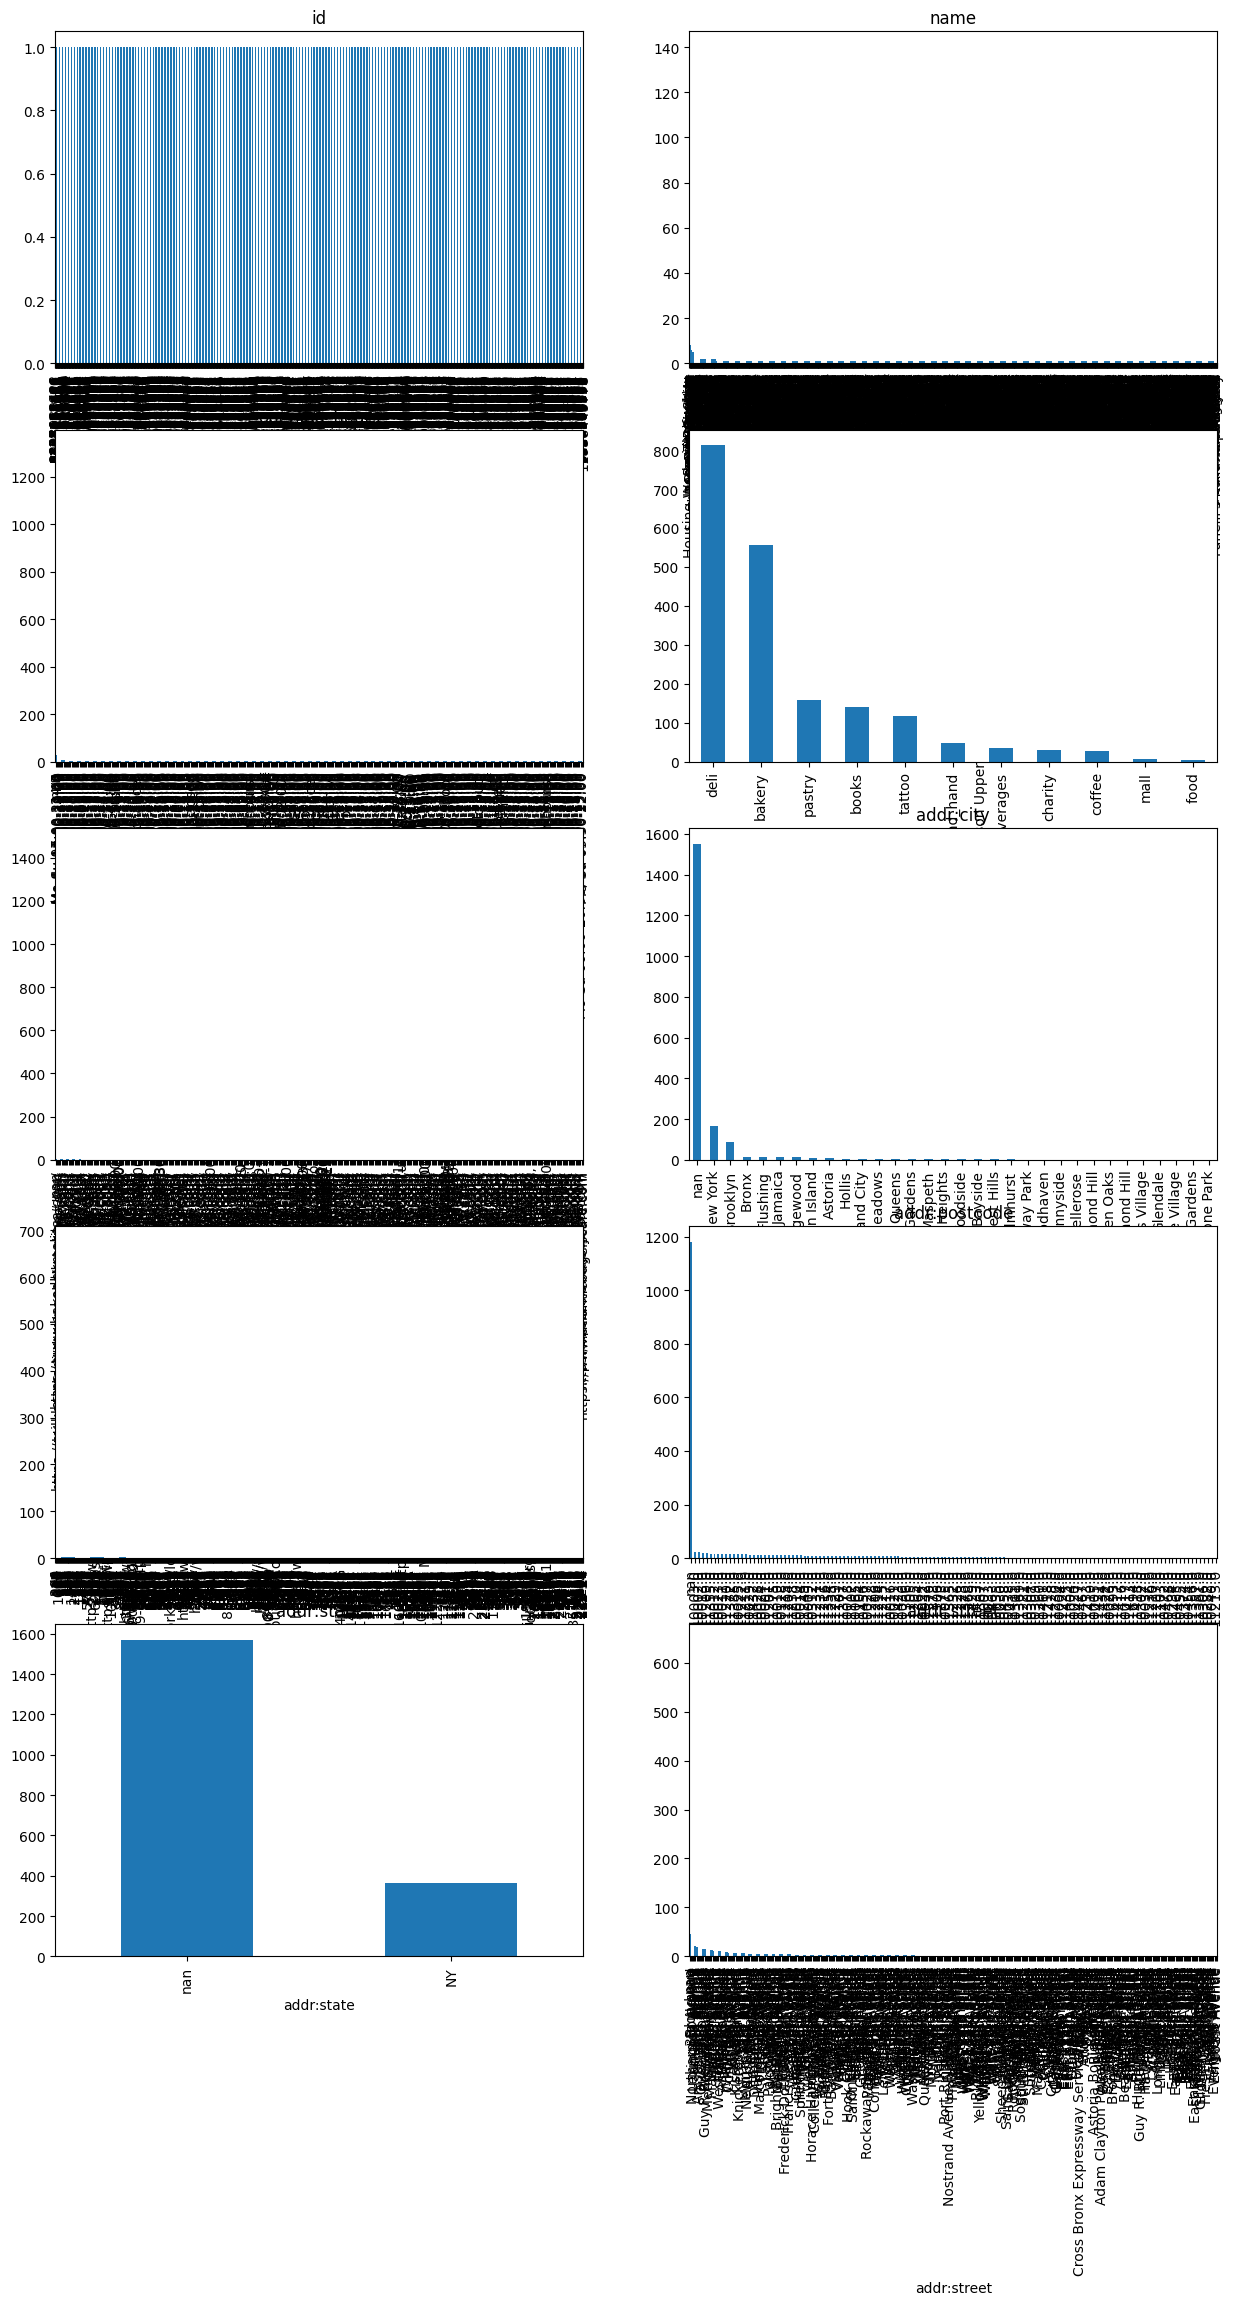

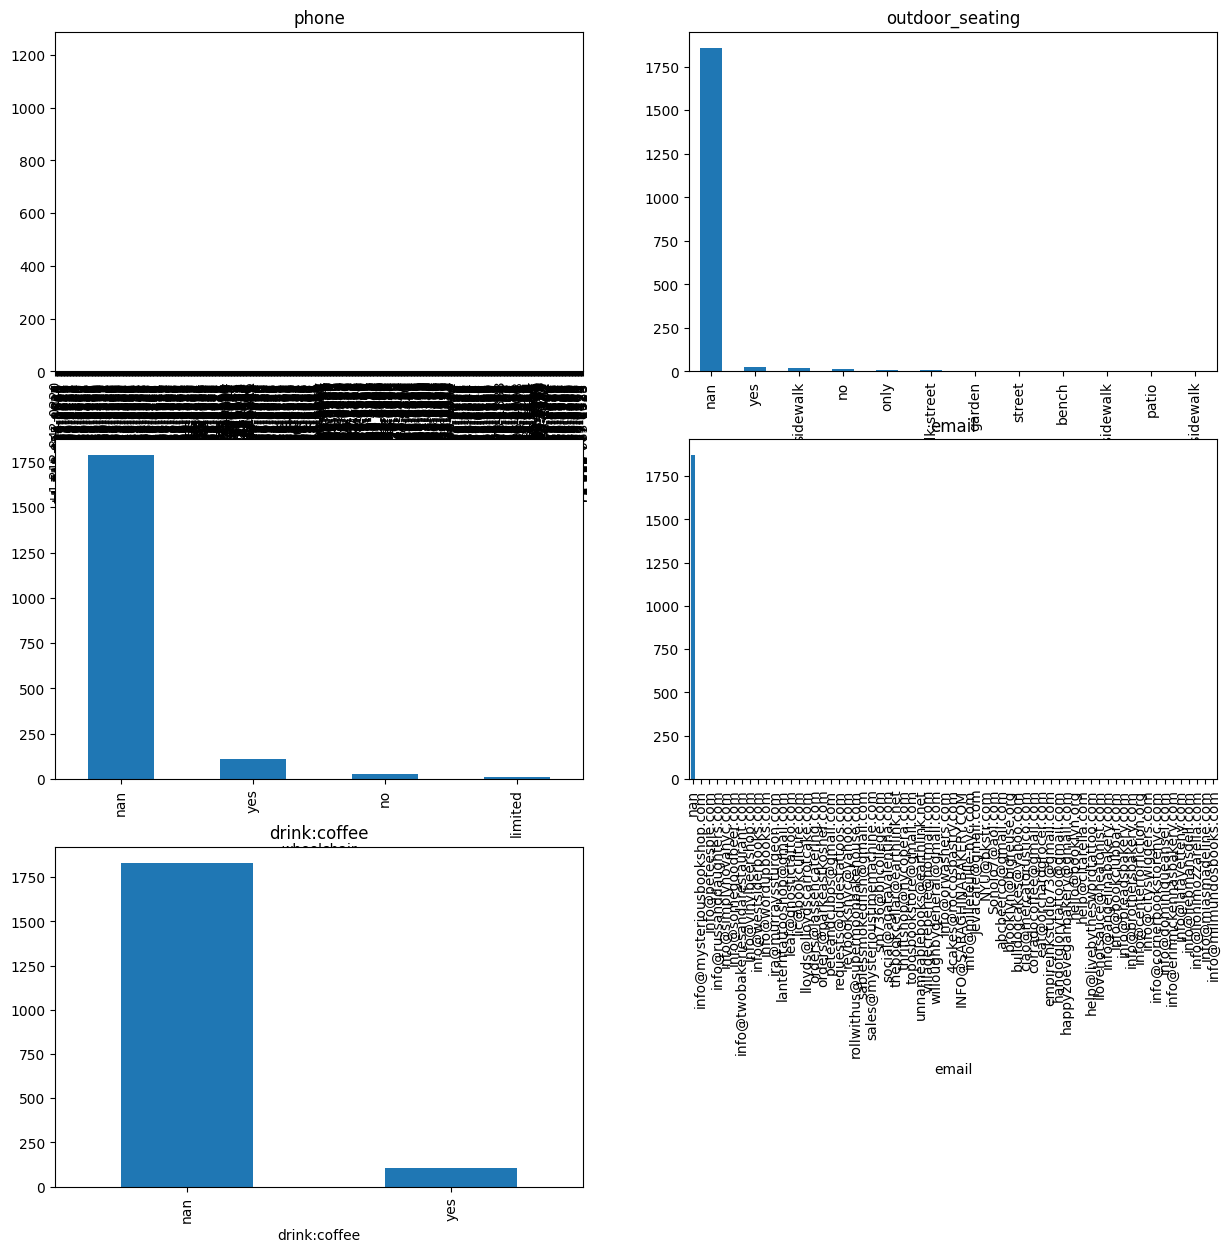

In [14]:
da.analyse()

In [15]:
params = {
    "title": "OSM Shop",
    "description": "shop",
    "source": "Overpass Turbo API",
    "detailed_desc": "information on different shops in New York City, including charity, book, and pastry shops",
    "source_link": "https://overpass-turbo.eu/"
}

dqr = DataQualityReport(da, params)
dqr.write_document()

In [32]:
for value in df['opening_hours'].unique():
    print(value)

Th-Su 12:00-18:00
Su 10:00-21:00; Mo-Th 09:00-21:00; Fr, Sa 09:00-22:00
nan
Tu-Sa 11:30-20:00
Mo-Sa 07:00-20:00; Su 08:00-19:00
Mo-Su 11:00-19:00
Tu-Su 11:00-18:00
Mo-Fr 10:00-18:00; Sa 11:00-17:00
Mo-Sa 10:00-20:00; Su 11:00-18:00
Mo-Su 10:00-20:00
Mo-Fr 09:00-21:00; Sa, Su 10:00-21:00
Mo-Sa 07:00-02:00; Su 08:00-20:00
Mo-Fr 8:00-16:00, 17:00-23:00; Sa 9:00-16:00, 17:00-23:00; Su 9:00-17:00
Mo-Fr 07:00-18:00; Sa-Su 08:00-18:00
Mo-Su 08:00-20:00
Mo-Su 08:30-00:30
Mo-Su 07:00-17:00
Mo-Su 09:00-19:00
Su-Th 06:00-24:00, Fr,Sa 06:00-01:00
Mo-Sa 09:00-08:45; Su 12:00-18:00
Tu-Th 12:00-21:00; Fr-Sa 12:00-22:00; Su 12:00-21:00
11:00-19:00
Tu,We,Su 08:00-19:00; Th-Sa 08:00-22:00
Mo-Sa 08:00-22:00; Su 08:00-21:00
06:00-22:00
Mo-Sa 08:00-00:00; Su 08:00-21:00
Mo-Th 11:00-19:00; Fr-Sa 11:00-20:00; Su 11:00-19:00
Th 08:00-19:00; Mo-We, Fr-Su 08:00-18:00
Tu-Su 10:00-19:00
Mo-Fr 08:00-17:00; Sa 09:00-17:00; Su 10:00-17:00
Tu-Su 08:00-13:00
Th,Fr,Sa 16:00-19:00
Th-Fr 10:00-17:00; Sa-Su 09:00-17:00
Mo

### Logical Integrity Tests 
1. Address State not NY.
2. Website doesn't start with https://
3. Zip codes not in list of known NYC zip codes
4. 


In [16]:
# Test 1:
df[(df['addr:state'] != 'NY') & ~( df['addr:state'].isna())]

,id,lat,lon,name,opening_hours,shop,website,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,phone,outdoor_seating,wheelchair,email,drink:coffee


In [17]:
# Test 2:
df['website'] = df['website'].astype(str)
df['website'] = df['website'].fillna('')
df[~(df['website'].str.startswith('https://') | df['website'].str.startswith('http://')) & ~(df['website'] == 'nan')]

,id,lat,lon,name,opening_hours,shop,website,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,phone,outdoor_seating,wheelchair,email,drink:coffee
239,2754781333,40.719582,-74.001546,Sacred Tattoo,NaN,tattoo,sacredtattoo.com,New York,424,10013.0,NaN,Broadway,+1 212 226-4286,NaN,no,NaN,NaN
600,5190673795,40.748005,-73.984589,Tattoo Removal Center,NaN,tattoo,tattooremovalcenter.com,New York,347,10016.0,NY,5th Avenue,+1 212-358-7500,NaN,NaN,NaN,NaN
1218,7024106348,40.729188,-73.998206,Mille Feuille,"Mo-Fr 07:00-19:00,Sa-Su 08:30-19:00",bakery,millefeuille-nyc.com,New York,552,10012.0,NY,LaGuardia Place,+1-212-533-4698,yes,yes,info@millefeuille-nyc.com,NaN
1415,8996353566,40.725269,-74.009358,Joanne Hendricks Cookbooks,11:30-7:00,books,Www.joannehendrickscookbooks.com,NaN,488,10013.0,NaN,Greenwich Street,+1 212 226 5731,NaN,yes,NaN,NaN
1725,10780222174,40.724078,-73.899137,Continental Pastry,We-Sa 09:00-17:00,pastry,www.pastrydelites.com/,Maspeth,65-51,11378.0,NY,Grand Avenue,+1-718-894-4916,NaN,NaN,NaN,NaN


In [20]:
# Test 3:
# Zip coes obtained from nyc_zip_codes_scrape.ipynb
zip = pd.read_csv("zipcodes.csv")
zip['zip'] = zip['zip'].astype('Int64')
zip['zip'] = zip['zip'].astype(str)


In [21]:
zip['zip']

0      10001
1      10002
2      10003
3      10004
4      10005
       ...  
475    10309
476    10310
477    10311
478    10312
479    10314
Name: zip, Length: 480, dtype: object

In [22]:
df['addr:postcode']

0           NaN
1       10003.0
2           NaN
3           NaN
4           NaN
         ...   
1928        NaN
1929        NaN
1930        NaN
1931        NaN
1932    11211.0
Name: addr:postcode, Length: 1933, dtype: category
Categories (134, float64): [10001.0, 10002.0, 10003.0, 10004.0, ..., 11434.0, 11435.0, 11693.0, 11694.0]

In [23]:
df['addr:postcode'] = df['addr:postcode'].astype('Int64')

In [24]:
df['addr:postcode'] = df['addr:postcode'].astype(str)

In [25]:
df[df['addr:postcode'].isin([11354])]

,id,lat,lon,name,opening_hours,shop,website,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,phone,outdoor_seating,wheelchair,email,drink:coffee


In [26]:
df[~df['addr:postcode'].isin(zip['zip']) & (df['addr:postcode'] != "<NA>")]

,id,lat,lon,name,opening_hours,shop,website,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,phone,outdoor_seating,wheelchair,email,drink:coffee
228,2718042381,40.763634,-73.967338,Baked By Melissa,09:00-21:00,bakery,nan,NaN,784,10065,NaN,Lexington Avenue,+1 212-842-0220,NaN,NaN,NaN,NaN
230,2723813008,40.768226,-73.963605,Shakespeare & Co,Mo-Fr 07:30-18:00; Sa 08:00-19:00; Su 09:00-18:00,books,nan,New York,939,10065,NY,Lexington Avenue,NaN,no,NaN,NaN,NaN
863,5702909870,40.760893,-73.960756,Goodwill,Mo-Su 11:00-19:00,charity,https://www.goodwillnynj.org,NaN,1114,10065,NaN,1st Avenue,+1 212-355-5206,NaN,NaN,NaN,NaN
884,5723747460,40.763749,-73.961806,Housing Works Thrift Shop,Mo-Sa 11:00-19:00; Su 11:00-18:00,charity,https://www.housingworks.org/locations/2nd-ave...,NaN,1222,10065,NaN,2nd Avenue,+1 646-975-5905,NaN,NaN,NaN,NaN
1050,6194871166,40.772512,-73.958829,Sable's Smoked Fish,Mo-Fr 08:15-18:30; Sa 07:30-18:30; Su 07:30-17:00,deli,https://sablesnyc.com,NaN,1330,10075,NaN,3rd Avenue,+1 212-249-6177,NaN,yes,sablessmokedfish@gmail.com,NaN
1058,6217348303,40.766272,-73.965401,Gourmet Bagel,NaN,bakery,nan,New York,874,10065,NY,Lexington Avenue,+1-212-535-3030,NaN,NaN,NaN,NaN
1074,6244721155,40.765597,-73.965557,Elim Deli Cafe,Mo-Sa 06:00-17:00; Su 07:00-15:00,deli,nan,New York,851,10065,NY,Lexington Avenue,(212)439-8320,NaN,NaN,NaN,NaN
1151,6670244876,40.766448,-73.960318,Grace's Marketplace,Mo-Sa 08:00-20:00; Su 08:00-19:00,deli,https://gracesmarketplace.com/,NaN,1299,10065,NaN,2nd Avenue,+1 212-737-0600,NaN,NaN,NaN,NaN
1163,6691104523,40.772194,-73.953085,Agata & Valentina,07:00-21:00,deli,https://www.agatavalentina.com/Store-Uptown.aspx,NaN,1505,10075,NaN,1st Avenue,+1 212-452-0690,NaN,NaN,social@agatavalentina.com,NaN
1164,6691104531,40.772159,-73.954131,Butterly Bakeshop,NaN,pastry,nan,NaN,341,10075,NaN,East 78th Street,+1 646-306-2806,NaN,NaN,NaN,NaN


Both zip codes exist in NYC, appears to be a data quality issue on the website where the NYC zip codes were scraped.